In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Final_FLights_Cords.csv')

In [4]:
df.head(10)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,o_latitude,o_longitude,d_latitude,d_longitude
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,1065.0,NaN,NaN,NaN,NaN,NaN,26.072599,-80.152702,40.692501,-74.168701
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,1399.0,NaN,NaN,NaN,NaN,NaN,44.882000,-93.221802,47.449001,-122.308998
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,680.0,NaN,NaN,NaN,NaN,NaN,39.861698,-104.672997,44.882000,-93.221802
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,1589.0,0.0,0.0,24.0,0.0,0.0,44.882000,-93.221802,37.618999,-122.375000
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,985.0,NaN,NaN,NaN,NaN,NaN,28.429399,-81.308998,32.896801,-97.038002
5,2019-07-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,665,DAL,"Dallas, TX",OKC,"Oklahoma City, OK",...,181.0,141.0,0.0,0.0,0.0,0.0,32.847099,-96.851799,35.393101,-97.600700
6,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134,DCA,"Washington, DC",BOS,"Boston, MA",...,399.0,NaN,NaN,NaN,NaN,NaN,38.852100,-77.037697,42.364300,-71.005203
7,2019-07-08,Republic Airline,Republic Airline: YX,YX,20452,4464,HSV,"Huntsville, AL",DCA,"Washington, DC",...,613.0,0.0,0.0,23.0,0.0,0.0,34.637199,-86.775101,38.852100,-77.037697
8,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",...,1379.0,NaN,NaN,NaN,NaN,NaN,29.984400,-95.341400,33.942501,-118.407997
9,2020-08-22,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,223,SEA,"Seattle, WA",FAI,"Fairbanks, AK",...,1533.0,NaN,NaN,NaN,NaN,NaN,47.449001,-122.308998,64.815102,-147.856003


In [5]:
delay_columns = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'CANCELLATION_CODE']

df[delay_columns] = df[delay_columns].fillna(0).infer_objects(copy=False)

In [6]:
def convert_to_hhmm(time_value):
    if isinstance(time_value, str) and len(time_value) == 4:
        return time_value
    elif pd.isnull(time_value):
        return '0000'
    elif isinstance(time_value, (int, float)):
        return f"{int(time_value):04d}"
    elif isinstance(time_value, time):
        return time_value.strftime('%H%M')
    else:
        raise ValueError("Unexpected time format")

In [7]:
df['DEP_TIME'] = df['DEP_TIME'].apply(convert_to_hhmm)
df['ARR_TIME'] = df['ARR_TIME'].apply(convert_to_hhmm)

In [8]:
df['DEP_HOUR'] = df['DEP_TIME'].str[:2].astype(int)
df['ARR_HOUR'] = df['ARR_TIME'].str[:2].astype(int)

In [9]:
df.head(2)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,o_latitude,o_longitude,d_latitude,d_longitude,DEP_HOUR,ARR_HOUR
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,0.0,0.0,0.0,26.072599,-80.152702,40.692501,-74.168701,11,14
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,0.0,0.0,0.0,44.882000,-93.221802,47.449001,-122.308998,21,23


In [10]:
df = df.dropna(subset=['ARR_DELAY'])
NAs = pd.concat([df.isnull().sum()], axis = 1, keys = ['flights'])
NAs[NAs.sum(axis=1) > 0]

,flights


In [11]:
X = df[['ORIGIN', 'AIRLINE_CODE','DEST', 'DEP_HOUR', 'ARR_HOUR','AIR_TIME','DEP_DELAY', 'ARR_DELAY', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
                  'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT'  ]]
categorical_features = ['AIRLINE_CODE', 'ORIGIN', 'DEST']
numerical_features = ['DEP_HOUR', 'ARR_HOUR','AIR_TIME','DEP_DELAY', 'ARR_DELAY', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
                  'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

n_clusters = 5

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=n_clusters, random_state=0))
])

pipeline.fit(X)
X_clustered = X.copy()
X_clustered['cluster'] = pipeline.predict(X)

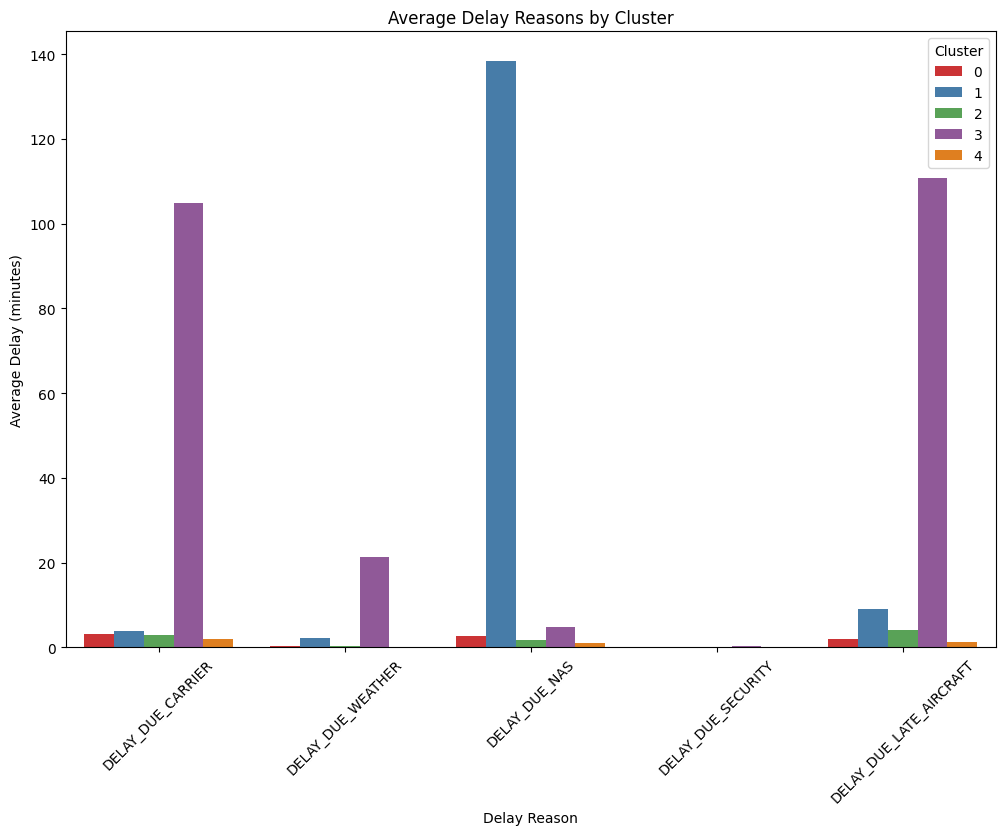

In [15]:
average_delays = X_clustered_df.groupby('cluster')[delay_reason_columns[:-1]].mean().reset_index()

average_delays_melted = pd.melt(average_delays, id_vars='cluster', var_name='Delay Reason', value_name='Average Delay')

plt.figure(figsize=(12, 8))
sns.barplot(x='Delay Reason', y='Average Delay', hue='cluster', data=average_delays_melted, palette='Set1')
plt.title('Average Delay Reasons by Cluster')
plt.xlabel('Delay Reason')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()


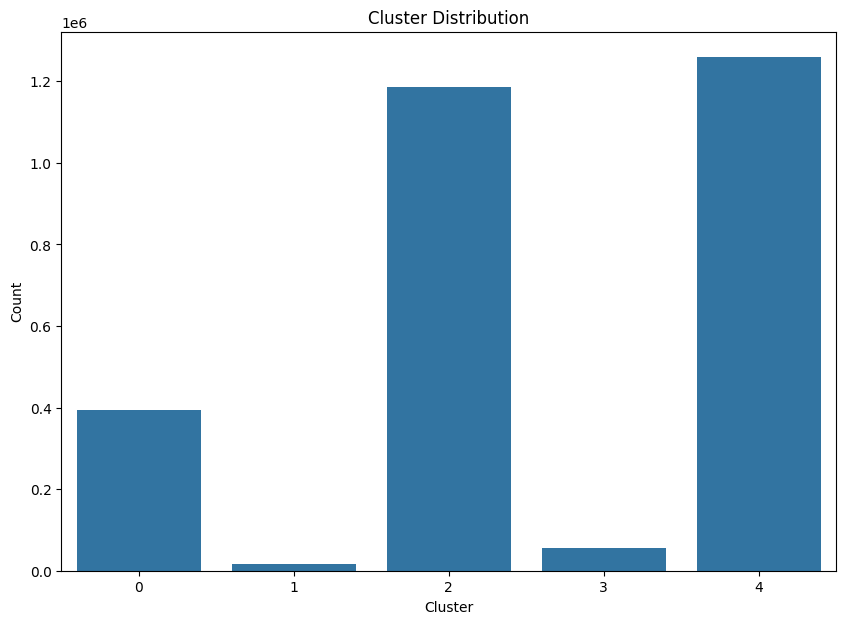

In [12]:
import seaborn as sns


plt.figure(figsize=(10, 7))
sns.countplot(data=X_clustered, x='cluster')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

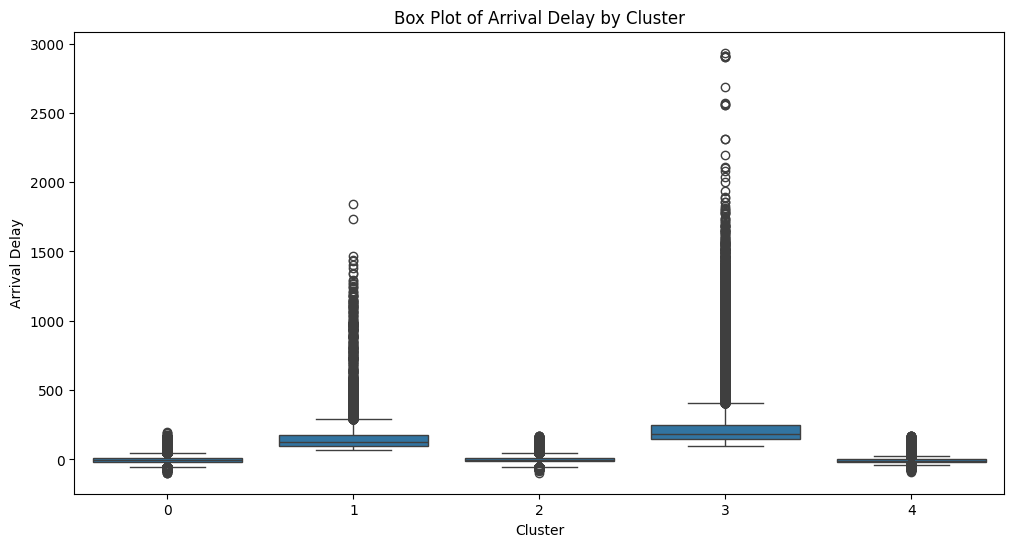

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_clustered, x='cluster', y='ARR_DELAY')
plt.title('Box Plot of Arrival Delay by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Arrival Delay')
plt.show()